In [1]:
import numpy as np
import pandas as pd


In [2]:
##Importação dos dados de treino

In [3]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_12520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_12520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_12520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [4]:
##Remoção de colunas inteiramente preenchidas por NaN

In [5]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [6]:
##Introdução do cabeçalho do data frame

In [7]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [8]:
##Geração de Histogramas e seleção de variáveis

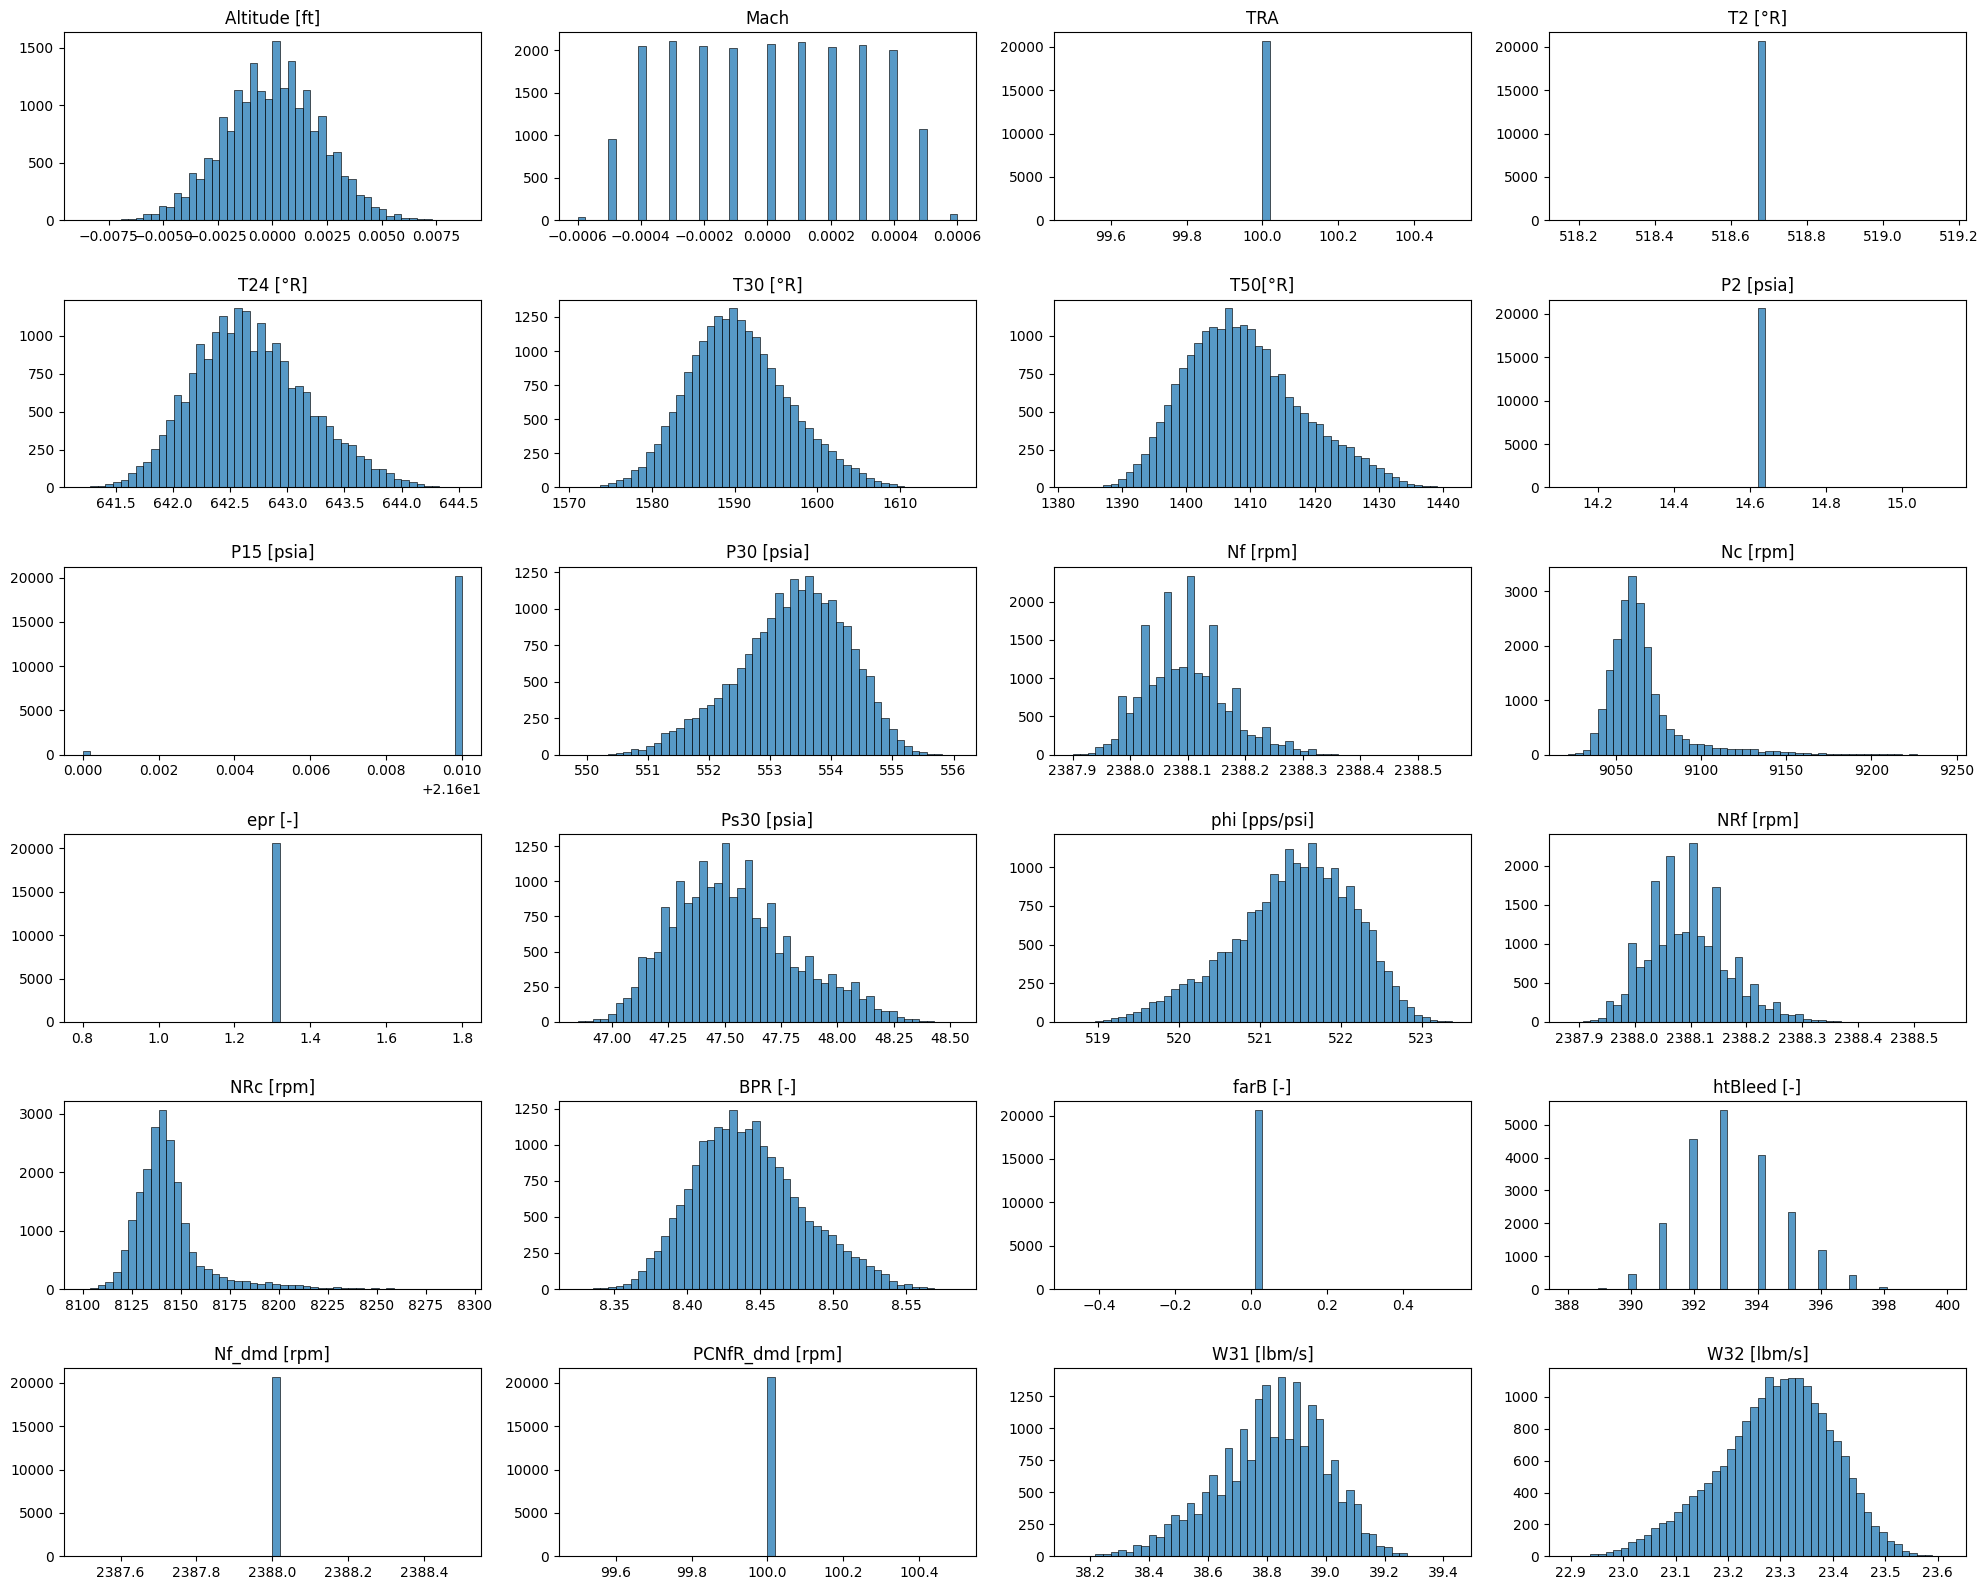

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [10]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [11]:
##Normalização 

In [12]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [13]:
##Definição dos targets para regressão e classificação nos dados de treino

In [14]:
limit_r = 130 
limit_c = 50
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit_r:
            aux.append(limit_r)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]
label_train = [1 if x >= limit_c else 0 for x in rul_train]

In [15]:
##Visualização de um ciclo de vida de um motor 

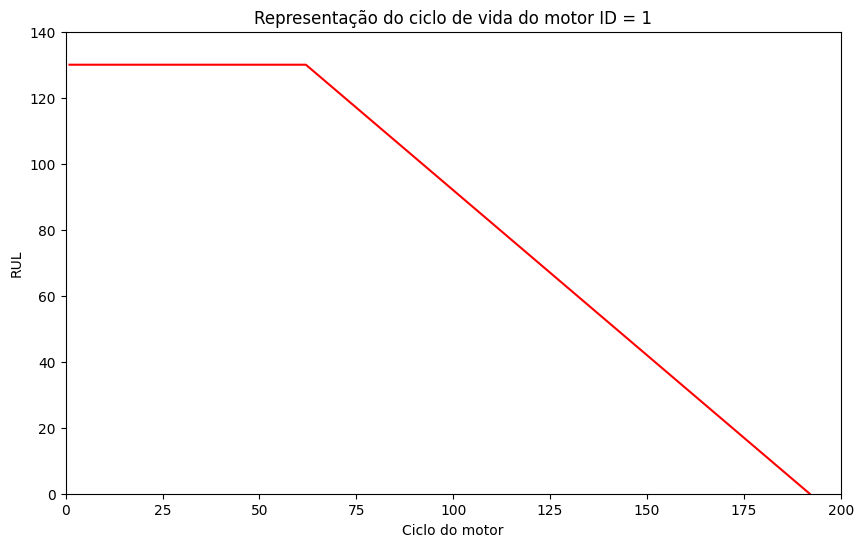

In [16]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [17]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [18]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit_r:
            rul_test.append(limit_r)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]
label_test = [1 if x >= limit_c else 0 for x in rul_test] 

In [19]:
##Criação das janelas de tempo para dados de treino e de teste

In [20]:
def time_window(data,rul,label,window_size,step):
    x,y_r,y_c = [], [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y_r.append(rul[l+f-1]) 
            y_c.append(label[l+f-1])
        l += len(engine)
    return np.array(x), np.array(y_r), np.array(y_c)
window_size = 30
step = 1
x_train, y_train_r,y_train_c= time_window(features_train,rul_train,
                                                        label_train,window_size,step)

print(x_train.shape,y_train_r.shape,y_train_c.shape)  
x_test, y_test_r,y_test_c = time_window(features_test,rul_test,
                                                        label_test,window_size,step)
print(x_test.shape,y_test_r.shape,y_test_c.shape)

(17731, 30, 18) (17731,) (17731,)
(10196, 30, 18) (10196,) (10196,)


In [21]:
##Separação das variáveis de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train_r,test_size=0.2,random_state=1)
x3,x4,y3,y4 = train_test_split(x_train,y_train_c,test_size=0.2,random_state=1) 

x1=x1.astype('float32')
x2=x2.astype('float32')
x3=x3.astype('float32')
x4=x4.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')
y3=y3.astype('float32')
y4=y4.astype('float32')


In [23]:
##Criação do modelo LSTM

In [24]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm_r=hp.Int('layers_lstm_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(LSTM(hp.Int('lstm_r_0',min_value=32,max_value=256,step=32),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_lstm_r):
        return_seq = i <n_layers_lstm_r -1
        model.add(LSTM(hp.Int(f'lstm_r_{i}',min_value=32,max_value=256,step=32),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Int(f'dense_r_{i+1}',min_value=32,max_value=256,step=32),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models()[0]
best_model_lstm.summary()
tuner_lstm.get_best_hyperparameters()[0].values

Trial 10 Complete [00h 03m 16s]
val_loss: 1893.2049560546875

Best val_loss So Far: 199.21975708007812
Total elapsed time: 01h 05m 32s


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 160)            │       184,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 192)            │        30,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,153 (1.41 MB)

 Trainable params: 369,153 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

{'layers_lstm_r': 3,
 'layers_dense_r': 1,
 'lstm_r_0': 64,
 'dropout_0': np.float64(0.2),
 'dense_r_1': 192,
 'learning_rate_r': 0.001,
 'lstm_r_1': 128,
 'dropout_1': np.float64(0.4000000000000001),
 'dense_r_2': 160,
 'lstm_r_2': 160,
 'dropout_2': np.float64(0.30000000000000004),
 'lstm_r_3': 160,
 'dropout_3': np.float64(0.5000000000000001)}

In [25]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 295.0825 - mean_absolute_error: 12.7360 - mean_squared_error: 295.0825

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - loss: 260.6276 - mean_absolute_error: 12.0503 - mean_squared_error: 260.6276 - val_loss: 234.3472 - val_mean_absolute_error: 10.4653 - val_mean_squared_error: 234.3472
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 243.2153 - mean_absolute_error: 11.6089 - mean_squared_error: 243.2153

71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - loss: 248.2483 - mean_absolute_error: 11.7686 - mean_squared_error: 248.2483 - val_loss: 188.3473 - val_mean_absolute_error: 10.1699 - val_mean_squared_error: 188.3473
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 249.1565 - mean_absolute_error: 11.6955 - mean_squared_error: 249.1565

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - loss: 247.1095 - mean_absolute_error: 11.6678 - mean_squared_error: 247.1095 - val_loss: 206.0953 - val_mean_absolute_error: 10.8307 - val_mean_squared_error: 206.0953
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 251.5322 - mean_absolute_error: 11.8596 - mean_squared_error: 251.5322

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - loss: 245.5203 - mean_absolute_error: 11.6992 - mean_squared_error: 245.5203 - val_loss: 216.4679 - val_mean_absolute_error: 10.6909 - val_mean_squared_error: 216.4679
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - loss: 239.2452 - mean_absolute_error: 11.5768 - mean_squared_error: 239.2452

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - loss: 240.1310 - mean_absolute_error: 11.5775 - mean_squared_error: 240.1310 - val_loss: 192.0921 - val_mean_absolute_error: 10.4716 - val_mean_squared_error: 192.0921


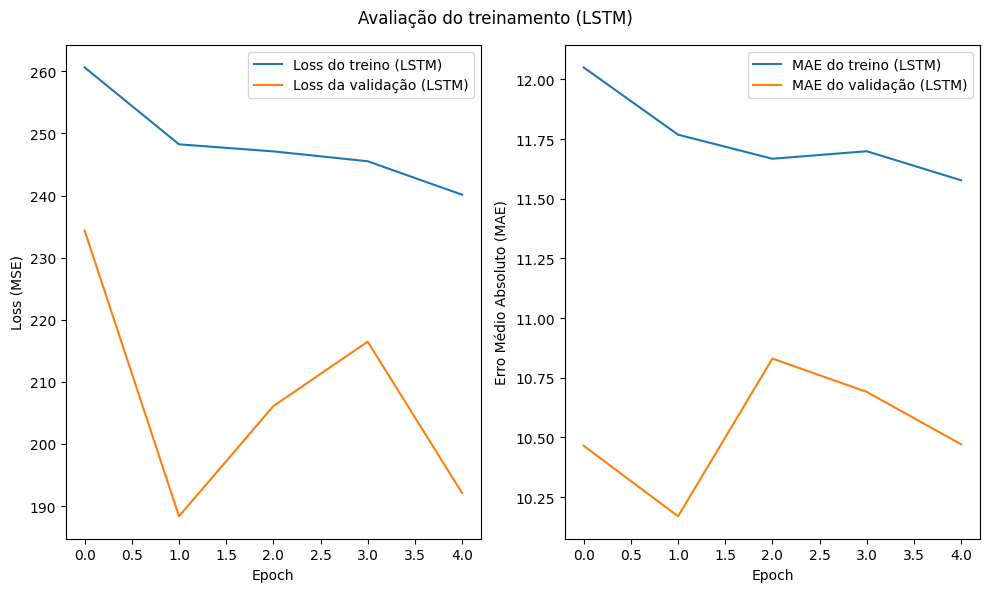

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('lstm_model_r.h5', monitor='val_loss')
history_r=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_r.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_r.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_r.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_r.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [27]:
##Testando o modelo com os dados de teste 

In [28]:
rul_prev_r = best_model_lstm.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [29]:
##Avaliando o modelo

220.19345729612846
14.84
0.12108404689299646
11.42117189542599
0.7776577577915695
Tempo de 4021.050988674164s


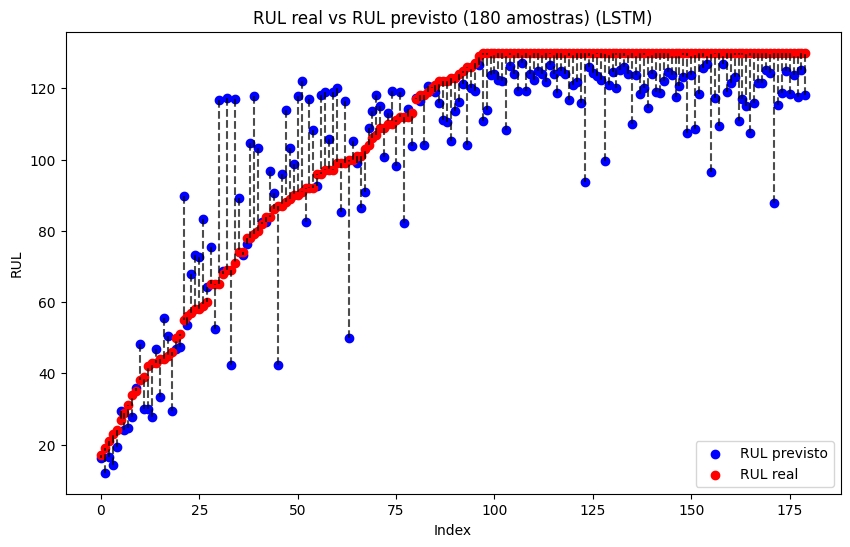

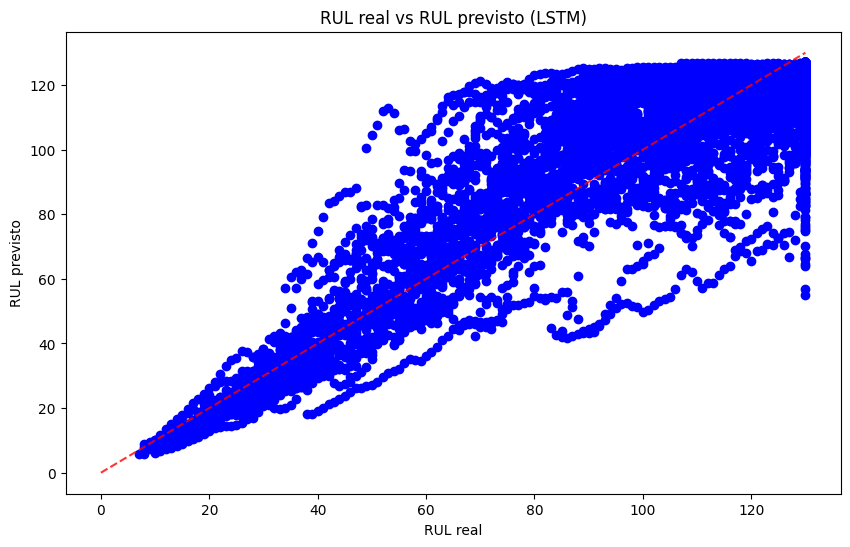

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [31]:
##Criando modelo BiLSTM

In [32]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi_r=hp.Int('layers_bi_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(Bidirectional(LSTM(hp.Int('bi_r_0',min_value=32,max_value=256,step=32),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_bi_r):
        return_seq = i <n_layers_bi_r -1
        model.add(Bidirectional(LSTM(hp.Int(f'bi_r_{i}',min_value=32,max_value=256,step=32),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Int(f'dense_r_{i+1}',min_value=32,max_value=256,step=32),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_regression',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models()[0]
best_model_bi.summary()
tuner_bilstm.get_best_hyperparameters()[0].values

Trial 10 Complete [00h 11m 36s]
val_loss: 207.1160888671875

Best val_loss So Far: 202.15980529785156
Total elapsed time: 01h 28m 41s


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 448)        │       435,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 448)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 30, 448)        │     1,206,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 448)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 30, 256)        │       590,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 448)            │       861,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 448)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │        43,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        21,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │        43,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,202,497 (12.22 MB)

 Trainable params: 3,202,497 (12.22 MB)

 Non-trainable params: 0 (0.00 B)

{'layers_bi_r': 3,
 'layers_dense_r': 3,
 'bi_r_0': 224,
 'dropout_0': np.float64(0.5000000000000001),
 'dense_r_1': 96,
 'learning_rate_r': 0.0001,
 'bi_r_1': 128,
 'dropout_1': np.float64(0.2),
 'bi_r_2': 224,
 'dropout_2': np.float64(0.4000000000000001),
 'dense_r_2': 224,
 'dense_r_3': 192,
 'bi_r_3': 224,
 'dropout_3': np.float64(0.5000000000000001)}

In [33]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 253.7382 - mean_absolute_error: 11.7494 - mean_squared_error: 253.7382

71/71 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - loss: 236.3593 - mean_absolute_error: 11.3535 - mean_squared_error: 236.3593 - val_loss: 241.6772 - val_mean_absolute_error: 11.7627 - val_mean_squared_error: 241.6772
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 232.4226 - mean_absolute_error: 11.2956 - mean_squared_error: 232.4226

71/71 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - loss: 227.3917 - mean_absolute_error: 11.1425 - mean_squared_error: 227.3917 - val_loss: 202.2890 - val_mean_absolute_error: 10.0344 - val_mean_squared_error: 202.2890
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 234.5284 - mean_absolute_error: 11.3404 - mean_squared_error: 234.5284

71/71 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - loss: 225.7376 - mean_absolute_error: 11.0788 - mean_squared_error: 225.7376 - val_loss: 224.5071 - val_mean_absolute_error: 10.9497 - val_mean_squared_error: 224.5071
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 223.2632 - mean_absolute_error: 11.0662 - mean_squared_error: 223.2632

71/71 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - loss: 226.1361 - mean_absolute_error: 11.1392 - mean_squared_error: 226.1361 - val_loss: 198.5098 - val_mean_absolute_error: 10.4883 - val_mean_squared_error: 198.5098
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 222.7340 - mean_absolute_error: 10.9725 - mean_squared_error: 222.7340

71/71 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - loss: 223.2308 - mean_absolute_error: 11.0230 - mean_squared_error: 223.2308 - val_loss: 192.5710 - val_mean_absolute_error: 10.2840 - val_mean_squared_error: 192.5710
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 221.8842 - mean_absolute_error: 11.0202 - mean_squared_error: 221.8842

71/71 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - loss: 221.3570 - mean_absolute_error: 10.9884 - mean_squared_error: 221.3570 - val_loss: 182.6877 - val_mean_absolute_error: 9.9720 - val_mean_squared_error: 182.6877
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 222.7710 - mean_absolute_error: 11.0708 - mean_squared_error: 222.7710

71/71 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - loss: 222.2384 - mean_absolute_error: 11.0219 - mean_squared_error: 222.2384 - val_loss: 227.0864 - val_mean_absolute_error: 11.1561 - val_mean_squared_error: 227.0864
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 215.6024 - mean_absolute_error: 10.8467 - mean_squared_error: 215.6024

71/71 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - loss: 218.0069 - mean_absolute_error: 10.8842 - mean_squared_error: 218.0069 - val_loss: 217.2059 - val_mean_absolute_error: 10.7745 - val_mean_squared_error: 217.2059
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 227.5819 - mean_absolute_error: 11.1928 - mean_squared_error: 227.5819

71/71 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - loss: 219.2791 - mean_absolute_error: 10.9370 - mean_squared_error: 219.2791 - val_loss: 186.9579 - val_mean_absolute_error: 9.8533 - val_mean_squared_error: 186.9579


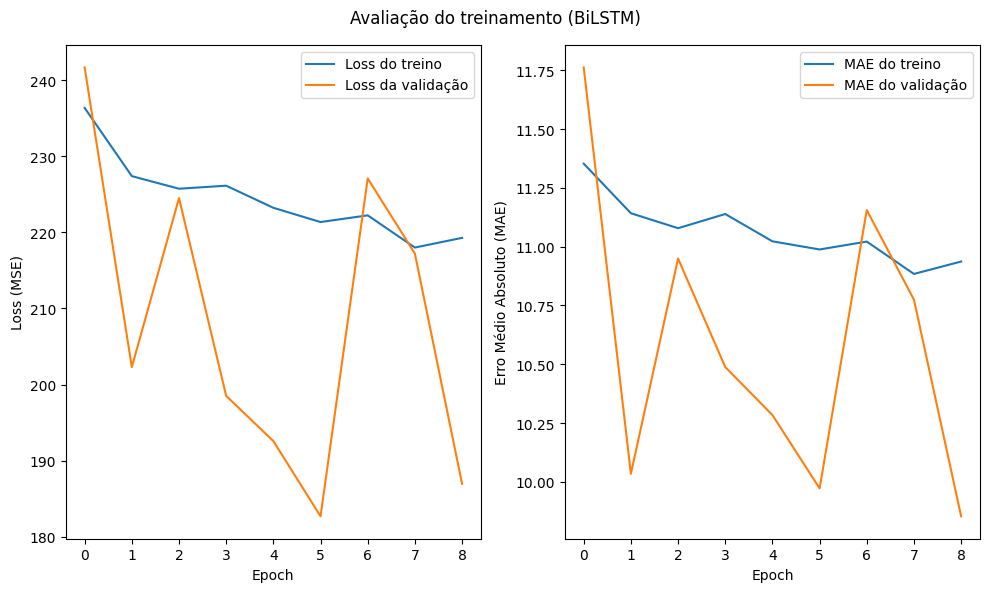

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('bi_model_r.h5', monitor='val_loss')
history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [35]:
##Testando o modelo com os dados de teste

In [36]:
rul_prev_r = best_model_bi.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 38s 108ms/step


In [37]:
##Avaliando o modelo

221.30883026153464
14.88
0.12421483848752332
11.037040132782234
0.7765315003220138
Tempo de 6402.761978626251s


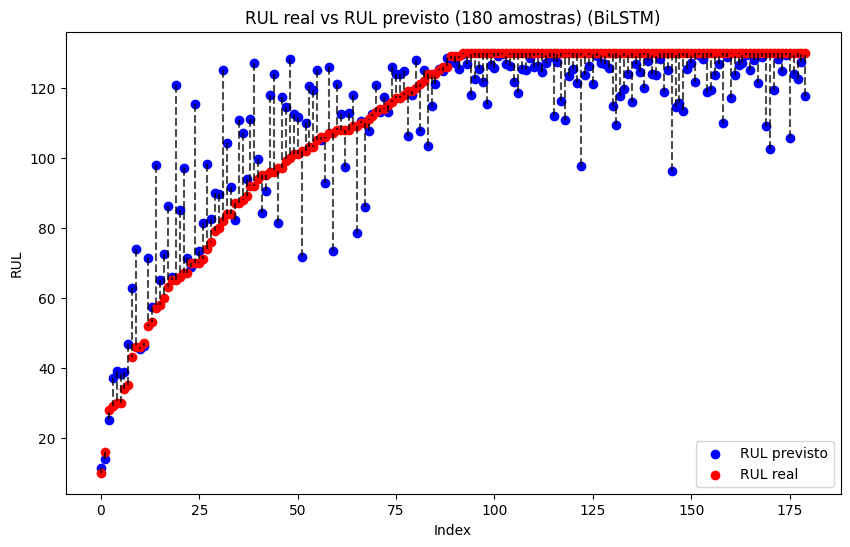

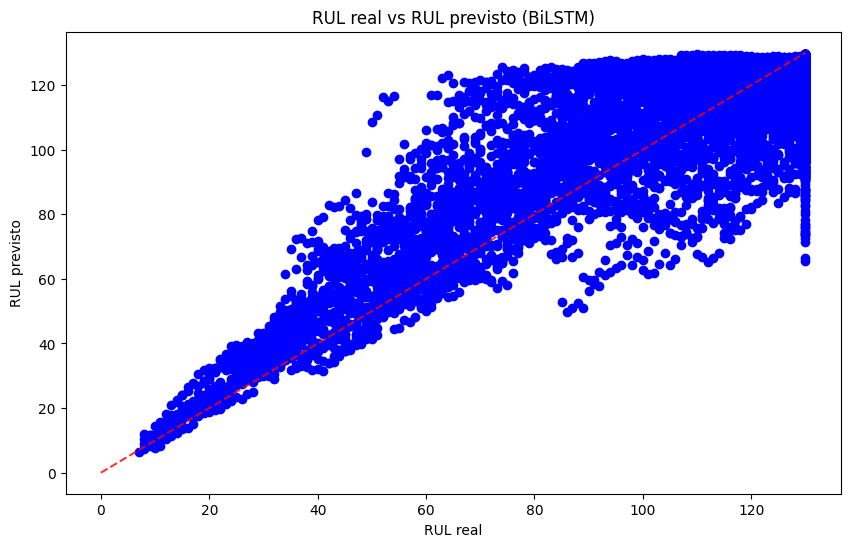

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()